# Requirements

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the future **count of page loads**. To accomplish this use data from the past three days, which includes information such as the **count of page loads**, **count of unique visits**, **count of first time-visits**, and **count of returning visits**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future **count of page loads** based on the provided historical data.

## The Website Visitors Dataset

## Downloading the Website Visitors Dataset

In [2]:
!gdown 1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe

Downloading...
From: https://drive.google.com/uc?id=1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe
To: /content/website-visitors.csv
100% 92.8k/92.8k [00:00<00:00, 125MB/s]


## Exploring the Website Visitors Dataset
This datatset consists of daily counts of page loads, unique visitors, first-time visitors, and returning visitors for an academic teaching notes website. The dataset contains 2167 rows spanning from September 14, 2014, to August 19, 2020. A visit is defined as a series of hits on one or more pages by the same user on a given day, identified by IP address. Shared IP addresses are considered a single user. A visit is "unique" if a hit from the same IP address hasn't occurred within the last 6 hours. Returning visitors are identified by cookies, and the rest are classified as first-time visitors. The unique visitor count is the sum of returning and first-time visitors.

The dataset consists of the following columns:
- date - date in mm/dd/yyyy format,
- day_of_week - day of the week in text form (Monday, Tuesday, etc.),
- page_loads - daily number of pages loaded,
- unique_visits - daily number of visitors from IP addresses with no hits in over 6 hours,
- first_time_visits - number of unique visitors without a identifying cookie, and
- returning_visits - number of unique visitors minus first-time visitors.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/website-visitors.csv')

In [5]:
df

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
0,9/14/2014,Sunday,2.146,1.582,1.430,152.0
1,9/15/2014,Monday,3.621,2.528,2.297,231.0
2,9/16/2014,Tuesday,3.698,2.630,2.352,278.0
3,9/17/2014,Wednesday,3.667,2.614,2.327,287.0
4,9/18/2014,Thursday,3.316,2.366,2.130,236.0
...,...,...,...,...,...,...
2162,8/15/2020,Saturday,2.221,1.696,1.373,323.0
2163,8/16/2020,Sunday,2.724,2.037,1.686,351.0
2164,8/17/2020,Monday,3.456,2.638,2.181,457.0
2165,8/18/2020,Tuesday,3.581,2.683,2.184,499.0


Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

array([[<Axes: title={'center': 'page_loads'}>,
        <Axes: title={'center': 'unique_visits'}>],
       [<Axes: title={'center': 'first_time_visits'}>,
        <Axes: title={'center': 'returning_visits'}>]], dtype=object)

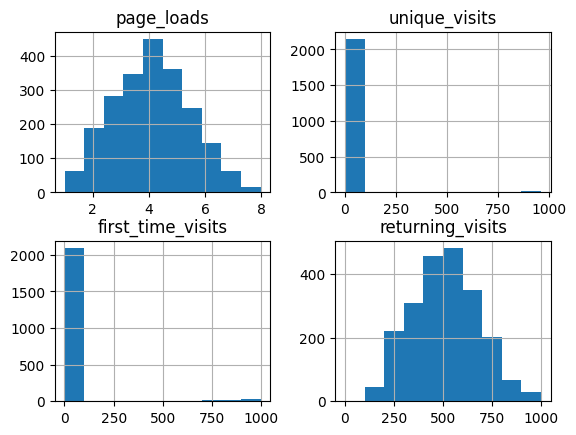

In [6]:
df.hist()

Drop the column **day_of_week**, because we won't use it.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [7]:
df=df.drop(columns=['day_of_week'],axis=1)

In [8]:
df

,date,page_loads,unique_visits,first_time_visits,returning_visits
0,9/14/2014,2.146,1.582,1.430,152.0
1,9/15/2014,3.621,2.528,2.297,231.0
2,9/16/2014,3.698,2.630,2.352,278.0
3,9/17/2014,3.667,2.614,2.327,287.0
4,9/18/2014,3.316,2.366,2.130,236.0
...,...,...,...,...,...
2162,8/15/2020,2.221,1.696,1.373,323.0
2163,8/16/2020,2.724,2.037,1.686,351.0
2164,8/17/2020,3.456,2.638,2.181,457.0
2165,8/18/2020,3.581,2.683,2.184,499.0


## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [9]:
df.columns

Index(['date', 'page_loads', 'unique_visits', 'first_time_visits',
       'returning_visits'],
      dtype='object')

In [10]:
fea=['page_loads', 'unique_visits', 'first_time_visits',
       'returning_visits']

In [11]:
for i in range(3,0,-1):
  for c in fea:
    df[c+' day_'+str(i)]=df[c].shift(i)

In [12]:
df

,date,page_loads,unique_visits,first_time_visits,returning_visits,page_loads day_3,unique_visits day_3,first_time_visits day_3,returning_visits day_3,page_loads day_2,unique_visits day_2,first_time_visits day_2,returning_visits day_2,page_loads day_1,unique_visits day_1,first_time_visits day_1,returning_visits day_1
0,9/14/2014,2.146,1.582,1.430,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/15/2014,3.621,2.528,2.297,231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.146,1.582,1.430,152.0
2,9/16/2014,3.698,2.630,2.352,278.0,NaN,NaN,NaN,NaN,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0
3,9/17/2014,3.667,2.614,2.327,287.0,2.146,1.582,1.430,152.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0
4,9/18/2014,3.316,2.366,2.130,236.0,3.621,2.528,2.297,231.0,3.698,2.630,2.352,278.0,3.667,2.614,2.327,287.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,8/15/2020,2.221,1.696,1.373,323.0,3.767,2.904,2.477,427.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0
2163,8/16/2020,2.724,2.037,1.686,351.0,3.621,2.780,2.322,458.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0
2164,8/17/2020,3.456,2.638,2.181,457.0,2.971,2.308,1.922,386.0,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0
2165,8/18/2020,3.581,2.683,2.184,499.0,2.221,1.696,1.373,323.0,2.724,2.037,1.686,351.0,3.456,2.638,2.181,457.0


In [13]:
df.isnull().sum()

date                       0
page_loads                 0
unique_visits              0
first_time_visits          0
returning_visits           0
page_loads day_3           3
unique_visits day_3        3
first_time_visits day_3    3
returning_visits day_3     3
page_loads day_2           2
unique_visits day_2        2
first_time_visits day_2    2
returning_visits day_2     2
page_loads day_1           1
unique_visits day_1        1
first_time_visits day_1    1
returning_visits day_1     1
dtype: int64

In [14]:
df=df.dropna(axis=0)

In [15]:
df.isnull().sum()

date                       0
page_loads                 0
unique_visits              0
first_time_visits          0
returning_visits           0
page_loads day_3           0
unique_visits day_3        0
first_time_visits day_3    0
returning_visits day_3     0
page_loads day_2           0
unique_visits day_2        0
first_time_visits day_2    0
returning_visits day_2     0
page_loads day_1           0
unique_visits day_1        0
first_time_visits day_1    0
returning_visits day_1     0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.

In [16]:
df.columns

Index(['date', 'page_loads', 'unique_visits', 'first_time_visits',
       'returning_visits', 'page_loads day_3', 'unique_visits day_3',
       'first_time_visits day_3', 'returning_visits day_3', 'page_loads day_2',
       'unique_visits day_2', 'first_time_visits day_2',
       'returning_visits day_2', 'page_loads day_1', 'unique_visits day_1',
       'first_time_visits day_1', 'returning_visits day_1'],
      dtype='object')

In [17]:
fea=['page_loads day_3', 'unique_visits day_3',
       'first_time_visits day_3', 'returning_visits day_3', 'page_loads day_2',
       'unique_visits day_2', 'first_time_visits day_2',
       'returning_visits day_2', 'page_loads day_1', 'unique_visits day_1',
       'first_time_visits day_1', 'returning_visits day_1']

In [18]:
X,Y=df[fea],df['returning_visits']

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [23]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
#Y_train=scaler.fit_transform(Y_train.array.reshape(1:-1))

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [24]:
X_train=X_train.reshape(X_train.shape[0],3,4)
X_test=X_test.reshape(X_test.shape[0],3,4)
#3 e broj na denovi 4 e broj na koloni unikatni

In [25]:
X_train.shape

(1731, 3, 4)

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the future **count of page loads** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dense, Dropout

In [27]:
model = Sequential()
model.add(LSTM(128,  activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
model.add(LSTM(64,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [ ]:
# Write your code here. Add as many boxes as you need.

In [29]:
import keras

In [30]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [32]:
history = model.fit(X_train, Y_train.values, epochs=18, batch_size=8,shuffle=False)

Epoch 1/18
217/217 [==============================] - 4s 21ms/step - loss: 32116.7832 - mean_squared_error: 32116.7832 - mean_absolute_error: 144.4774
Epoch 2/18
217/217 [==============================] - 2s 11ms/step - loss: 32028.2422 - mean_squared_error: 32028.2422 - mean_absolute_error: 144.2331
Epoch 3/18
217/217 [==============================] - 2s 11ms/step - loss: 31887.5508 - mean_squared_error: 31887.5508 - mean_absolute_error: 143.9881
Epoch 4/18
217/217 [==============================] - 2s 11ms/step - loss: 31737.1602 - mean_squared_error: 31737.1602 - mean_absolute_error: 143.6793
Epoch 5/18
217/217 [==============================] - 4s 16ms/step - loss: 31582.3984 - mean_squared_error: 31582.3984 - mean_absolute_error: 143.3415
Epoch 6/18
217/217 [==============================] - 3s 13ms/step - loss: 31421.4082 - mean_squared_error: 31421.4082 - mean_absolute_error: 142.9520
Epoch 7/18
217/217 [==============================] - 2s 11ms/step - loss: 31253.0957 - mean_s

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

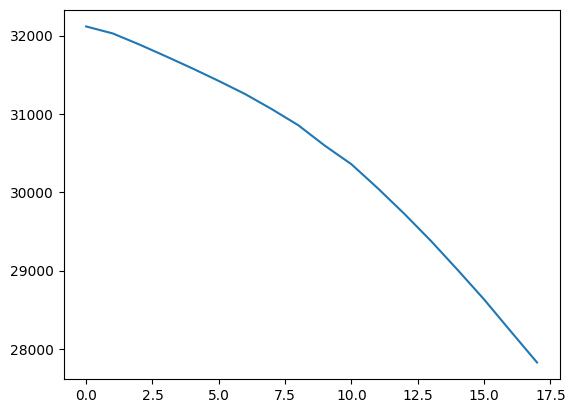

In [34]:
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['mean_squared_error'], label='val_loss')

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [35]:
y_pred=model.predict(X_test)

14/14 [==============================] - 1s 5ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [36]:
print(r2_score(Y_test,y_pred))

-0.9819909929277444


Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

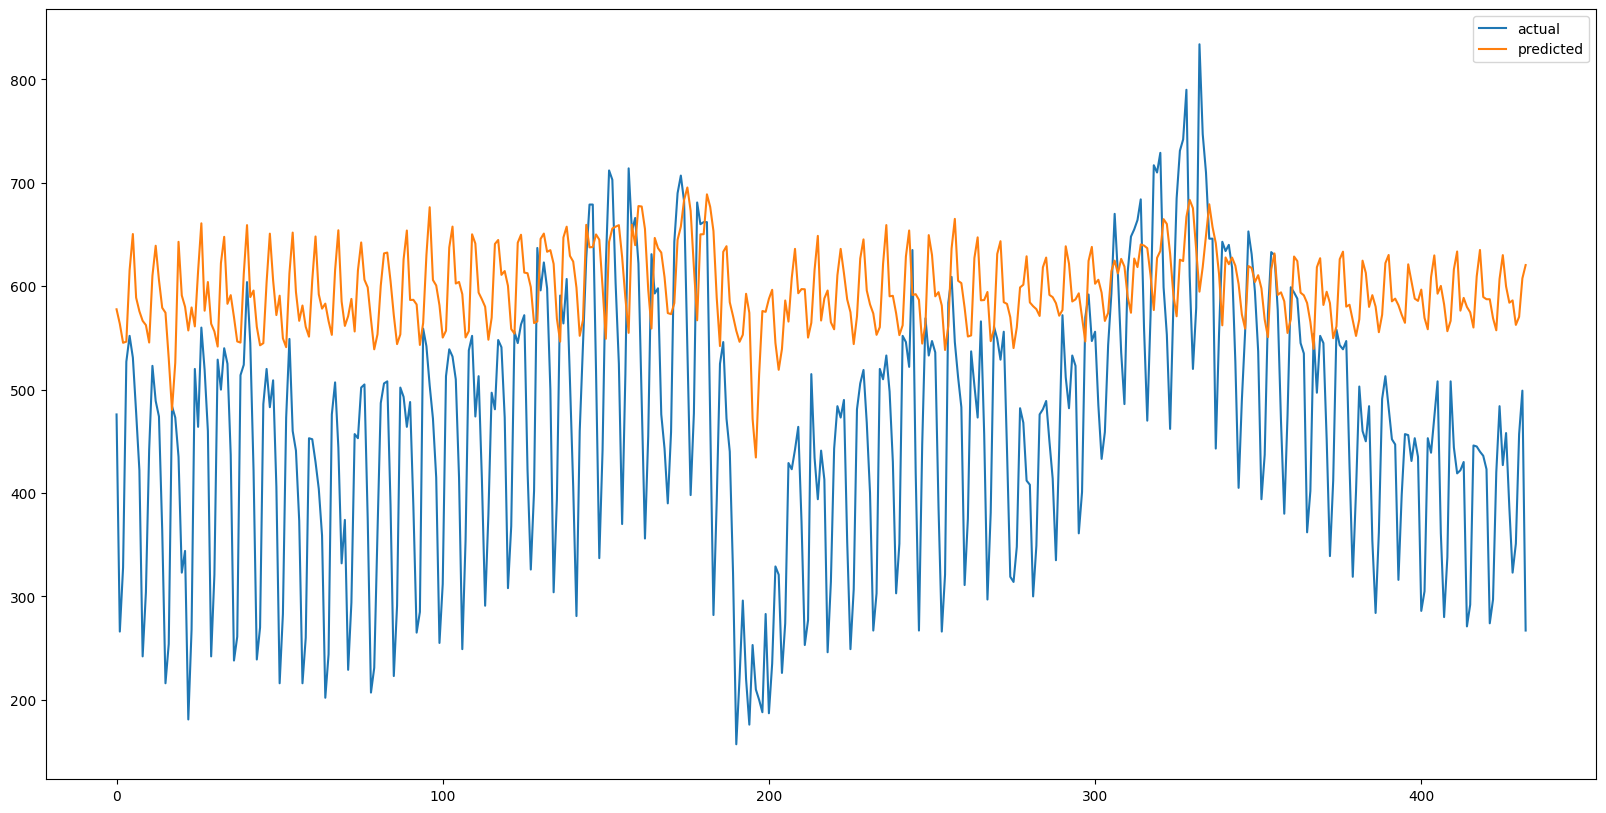

In [37]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to perform a sentiment analysis on a dataset consisting of wine reviews. The dataset contains two attributes: **description** and **points**. The description is a brief text describing the wine and the points which represents a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

The greater part of the code for the solution is already given. You need to define a tokenizer to tokenize the given texts and a deep neural network model that will be used for the classification task at hand. Fill in only the missing code blocks.

## Requirements

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Downloading the Wine Reviews Dataset

In [39]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Downloading...
From: https://drive.google.com/uc?id=1fz9449M9Owofy6CYrKzkGwXKesI32B8u
To: /content/wine-reviews.csv
100% 32.5M/32.5M [00:00<00:00, 151MB/s]


## Exploring the Wine Reviews Dataset

Load the dataset into a `pandas` data frame.

In [40]:
df = pd.read_csv('wine-reviews.csv')

In [41]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


## Feature Extraction

Extract the feature `exceptional` for each wine review.

In [42]:
df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

In [43]:
df.head()

,description,points,exceptional
0,"Aromas include tropical fruit, broom, brimston...",87,0
1,"This is ripe and fruity, a wine that is smooth...",87,0
2,"Tart and snappy, the flavors of lime flesh and...",87,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,0
4,"Much like the regular bottling from 2012, this...",87,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [44]:
X, y = df['description'], df['exceptional']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Text Tokenization

Use tokenizer to convert raw text into a sequence of tokens.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [46]:
df['num_words'] = df['description'].apply(lambda x: len(x.split(" ")))

<Axes: >

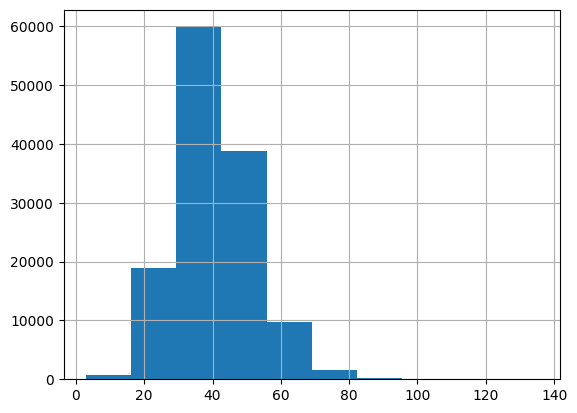

In [47]:
df['num_words'].hist()

In [51]:
max_tokens=55

In [52]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

## Padding
Pad each sequence to maximum length of 16.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [53]:
len_tokens = [len(token_list) for token_list in X_train]

(array([3.7300e+02, 8.7410e+03, 3.6786e+04, 3.9083e+04, 1.5570e+04,
        3.0990e+03, 2.7400e+02, 3.9000e+01, 8.0000e+00, 3.0000e+00]),
 array([ 0. ,  6.2, 12.4, 18.6, 24.8, 31. , 37.2, 43.4, 49.6, 55.8, 62. ]),
 <BarContainer object of 10 artists>)

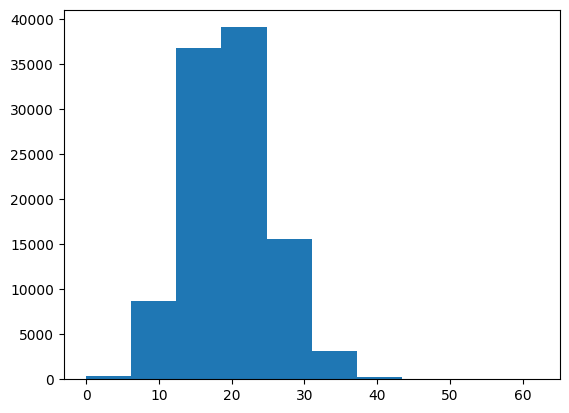

In [58]:
plt.hist(len_tokens)

In [61]:
maxlen=25

In [62]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [63]:
X_train.shape

(103976, 25)

## Deep Neural Network

Define Deep Neural Network model to predict if a specific wine is exceptional or not based on the tokenized and padded wine reviews.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [87]:
model = Sequential()
#model.add(Embedding(max_tokens, 32, input_length=pd.DataFrame(X_train).shape[1]  ))

#model.add(Embedding(max_tokens, 32, input_length=len(X_train)))

model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compile the previously defined model specifying loss function, optimizer and evaluation metrics.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [88]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

Fit the compiled model on the train set specifying the percent for validation, batch_size, and number of epochs.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [72]:
type(Y_train.values)

numpy.ndarray

In [92]:
history = model.fit(X_train, y_train.values, validation_split=0.2, batch_size=32, epochs=5)

Epoch 1/5
2600/2600 [==============================] - 137s 53ms/step - loss: 0.5498 - precision_8: 0.6581 - recall_8: 0.5186 - val_loss: 0.5469 - val_precision_8: 0.6845 - val_recall_8: 0.4881
Epoch 2/5
2600/2600 [==============================] - 130s 50ms/step - loss: 0.5457 - precision_8: 0.6606 - recall_8: 0.5241 - val_loss: 0.5446 - val_precision_8: 0.6481 - val_recall_8: 0.5774
Epoch 3/5
2600/2600 [==============================] - 122s 47ms/step - loss: 0.5429 - precision_8: 0.6632 - recall_8: 0.5297 - val_loss: 0.5428 - val_precision_8: 0.6887 - val_recall_8: 0.4794
Epoch 4/5
2600/2600 [==============================] - 132s 51ms/step - loss: 0.5396 - precision_8: 0.6651 - recall_8: 0.5356 - val_loss: 0.5397 - val_precision_8: 0.6443 - val_recall_8: 0.5930
Epoch 5/5
2600/2600 [==============================] - 123s 47ms/step - loss: 0.5346 - precision_8: 0.6708 - recall_8: 0.5437 - val_loss: 0.5381 - val_precision_8: 0.6531 - val_recall_8: 0.5757


Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

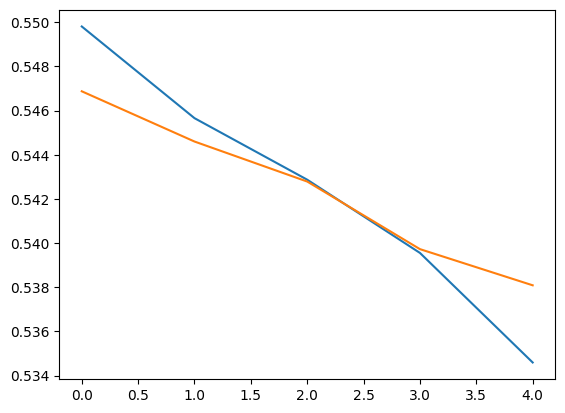

In [93]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

Use the trained model to make predictions for the test set.

In [94]:
y_pred = model.predict(X_test)

813/813 [==============================] - 4s 5ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [95]:
print(classification_report(y_test, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79     16101
           1       0.66      0.57      0.61      9894

    accuracy                           0.73     25995
   macro avg       0.71      0.70      0.70     25995
weighted avg       0.72      0.73      0.72     25995

